The best-fit line is: Price = 0.22 * Size + 27.77
Predicted price for a 1100 sq ft house: ₹273.40


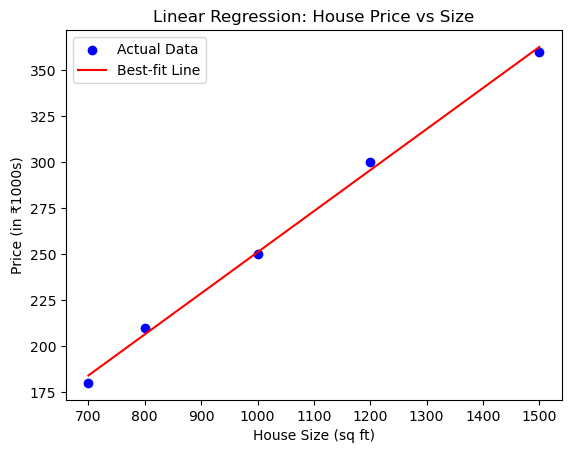

In [4]:
#1) Linear Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

house_sizes = np.array([700, 800, 1000, 1200, 1500]).reshape(-1, 1)
house_prices = np.array([180, 210, 250, 300, 360])
model = LinearRegression()
model.fit(house_sizes, house_prices)
slope = model.coef_[0]
intercept = model.intercept_
print(f"The best-fit line is: Price = {slope:.2f} * Size + {intercept:.2f}")
new_size = np.array([[1100]])
predicted_price = model.predict(new_size)
print(f"Predicted price for a {new_size[0][0]} sq ft house: ₹{predicted_price[0]:.2f}")
plt.scatter(house_sizes, house_prices, color='blue', label='Actual Data')
plt.plot(house_sizes, model.predict(house_sizes), color='red', label='Best-fit Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price (in ₹1000s)')
plt.title('Linear Regression: House Price vs Size')
plt.legend()
plt.show()

The learned linear part is: z = (1.35 * hours) + (-4.53)

For a student who studied 2 hours:
  Predicted class (Pass=1/Fail=0): 0
  Probability of failing: 0.86
  Probability of passing: 0.14


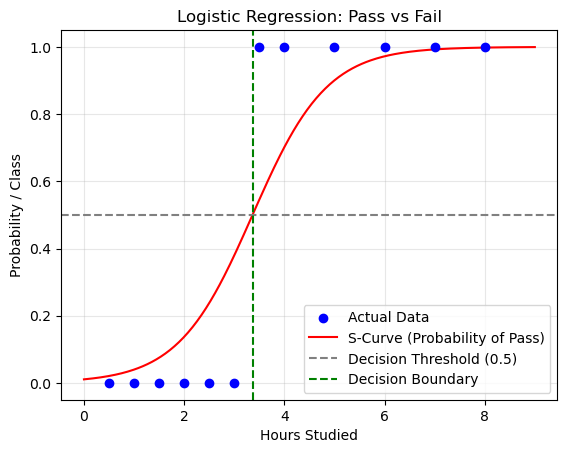

In [6]:
#2) Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

hours_studied = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 8]).reshape(-1, 1)
exam_result = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression()
model.fit(hours_studied, exam_result)
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"The learned linear part is: z = ({coefficient:.2f} * hours) + ({intercept:.2f})")
new_hours = np.array([[2]])
predicted_class = model.predict(new_hours)
predicted_probability = model.predict_proba(new_hours)
print(f"\nFor a student who studied {new_hours[0][0]} hours:")
print(f"  Predicted class (Pass=1/Fail=0): {predicted_class[0]}")
print(f"  Probability of failing: {predicted_probability[0][0]:.2f}")
print(f"  Probability of passing: {predicted_probability[0][1]:.2f}")
hours_range = np.linspace(0, 9, 300).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]
plt.scatter(hours_studied, exam_result, color='blue', label='Actual Data', zorder=3)
plt.plot(hours_range, probabilities, color='red', label='S-Curve (Probability of Pass)')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.axvline(x= -intercept/coefficient, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Hours Studied')
plt.ylabel('Probability / Class')
plt.title('Logistic Regression: Pass vs Fail')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The new animal is predicted to be a: Bird

Probability for each class:
  Bird: 1.00
  Fish: 0.00
  Mammal: 0.00


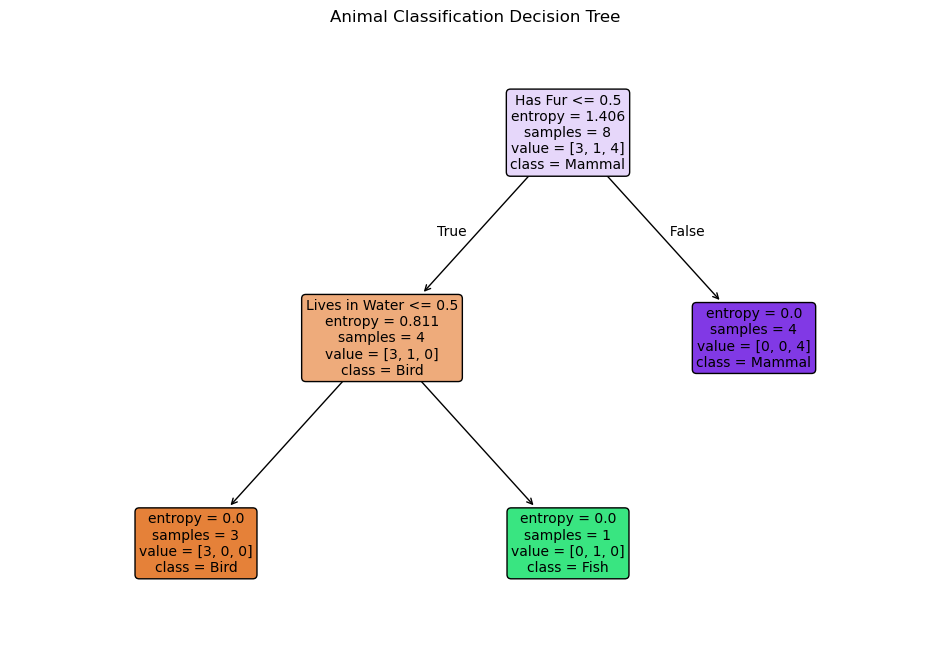


--- Text-based Representation of the Tree ---
(This is like the flowchart in text form)
|--- Has Fur <= 0.50
|   |--- Lives in Water <= 0.50
|   |   |--- class: Bird
|   |--- Lives in Water >  0.50
|   |   |--- class: Fish
|--- Has Fur >  0.50
|   |--- class: Mammal



In [7]:
#3) Decision Tree

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = {
    'Has Fur':       [1, 1, 1, 0, 0, 0, 0, 1],
    'Has Feathers':  [0, 0, 0, 1, 1, 1, 0, 0],
    'Can Fly':       [0, 0, 0, 1, 1, 0, 0, 0],
    'Lives in Water':[0, 0, 1, 0, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

animal_type = ['Mammal', 'Mammal', 'Mammal', 'Bird', 'Bird', 'Bird', 'Fish', 'Mammal']
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(df, animal_type)
new_animal = pd.DataFrame({
    'Has Fur': [0],
    'Has Feathers': [1],
    'Can Fly': [1],
    'Lives in Water': [0]
})
prediction = model.predict(new_animal)
prediction_proba = model.predict_proba(new_animal)
print(f"The new animal is predicted to be a: {prediction[0]}")
print("\nProbability for each class:")
for i, class_name in enumerate(model.classes_):
    print(f"  {class_name}: {prediction_proba[0][i]:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=df.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Animal Classification Decision Tree")
plt.show()
print("\n--- Text-based Representation of the Tree ---")
print("(This is like the flowchart in text form)")
text_representation = tree.export_text(model, feature_names=list(df.columns))
print(text_representation)

In [8]:
#4) Random Forest

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]
print("First 5 rows of the dataset:")
print(df.head())
print("\n")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Accuracy on training data: {train_accuracy:.2f}")
print(f"Accuracy on testing data:  {test_accuracy:.2f}")
print("\n")
new_flower = [[5.1, 3.5, 1.4, 0.2]]
predicted_class = model.predict(new_flower)
predicted_probabilities = model.predict_proba(new_flower)
print(f"Predicted species for the new flower: {target_names[predicted_class[0]]}")
print("Probability for each species:")
for i, species in enumerate(target_names):
    print(f"  {species}: {predicted_probabilities[0][i]:.3f}")
print("\n--- Feature Importance ---")
print("(Which measurements the forest found most useful for classification)")
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print(feature_importance_df)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Accuracy on training data: 1.00
Accuracy on testing data:  1.00


Predicted species for the new flower: setosa
Probability for each species:
  setosa: 1.000
  versicolor: 0.000
  virginica: 0.000

--- Feature Importance ---
(Which measurements the forest found most useful for classification)
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.1041

The decision boundary line is: -0.49*x1 + -0.96*x2 + 5.34 = 0

Number of support vectors: 34

Prediction for point [4 5]: Class 0


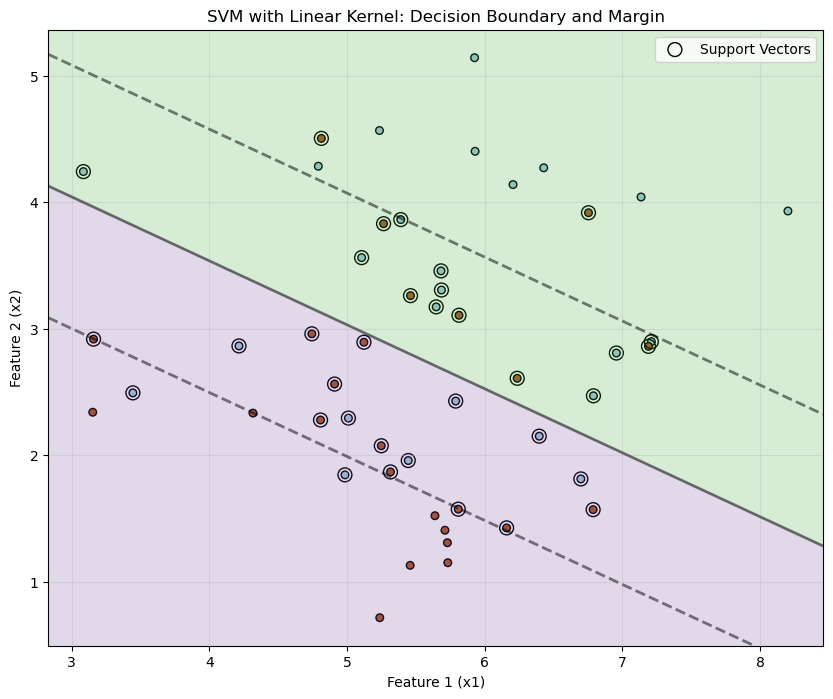


--- Trying with RBF Kernel (for non-linear data) ---


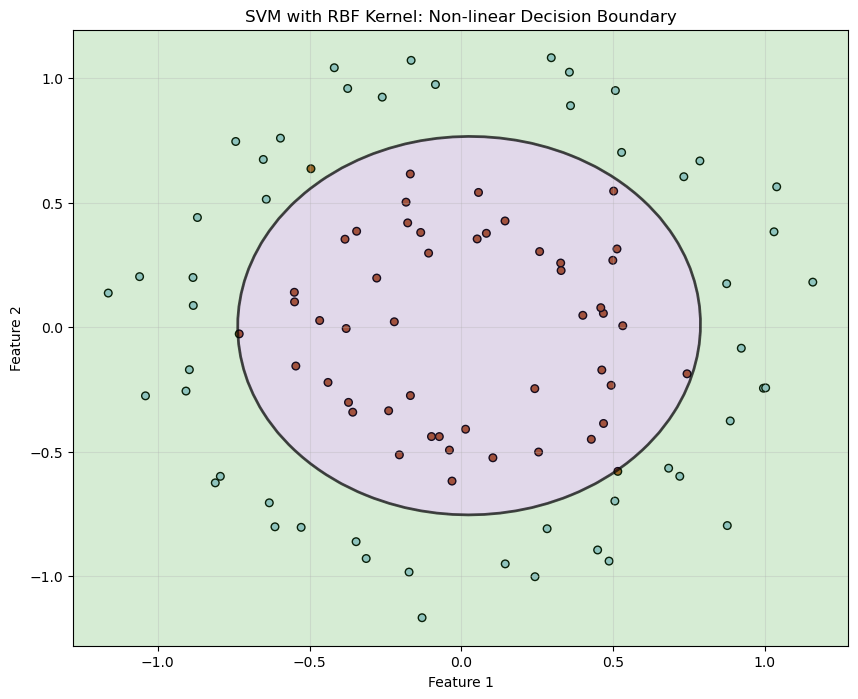

In [9]:
#5) Support Vectors Machine

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6, center_box=(2, 6))
model = svm.SVC(kernel='linear', C=1000)  # C is a regularization parameter
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]
print(f"The decision boundary line is: {w[0]:.2f}*x1 + {w[1]:.2f}*x2 + {b:.2f} = 0")
support_vectors = model.support_vectors_
print(f"\nNumber of support vectors: {len(support_vectors)}")
new_point = np.array([[4, 5]])
prediction = model.predict(new_point)
print(f"\nPrediction for point {new_point[0]}: Class {prediction[0]}")
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1, label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=2)
ax.contourf(XX, YY, Z, levels=[Z.min(), 0, Z.max()], alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('SVM with Linear Kernel: Decision Boundary and Margin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print("\n--- Trying with RBF Kernel (for non-linear data) ---")
from sklearn.datasets import make_circles
X_circle, y_circle = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
model_rbf = svm.SVC(kernel='rbf', gamma='auto')
model_rbf.fit(X_circle, y_circle)
plt.figure(figsize=(10, 8))
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=30, cmap=plt.cm.Paired, edgecolors='k')
xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.7, linestyles=['-'], linewidths=2)
plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.2, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel: Non-linear Decision Boundary')
plt.grid(True, alpha=0.3)
plt.show()

Accuracy with k=5: 0.82
New flower prediction: setosa
Probabilities: [[1. 0. 0.]]


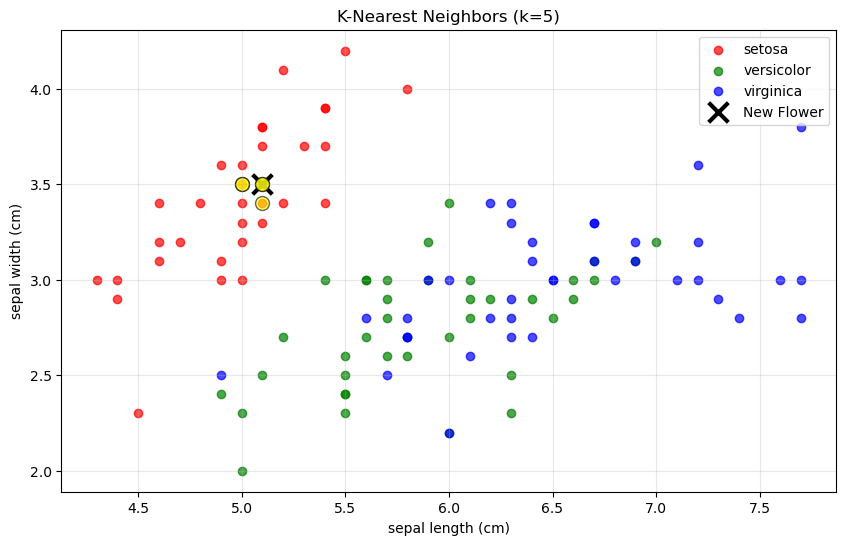

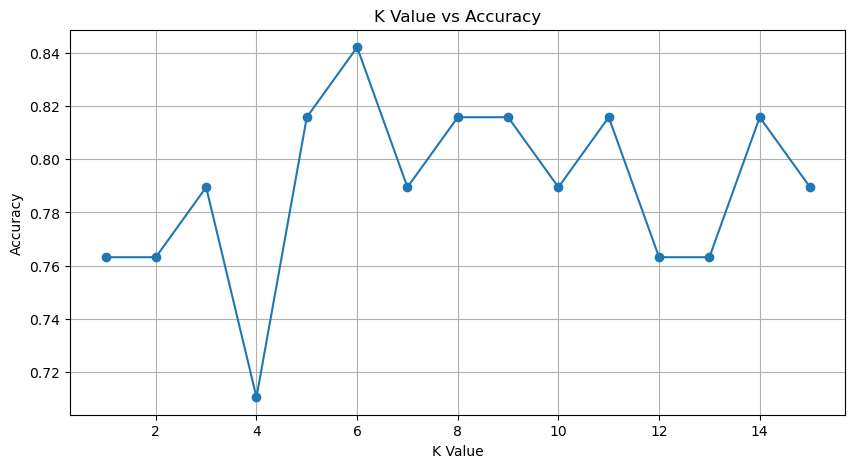

In [10]:
#6) K-Nearest Neighbors

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")
new_flower = np.array([[5.1, 3.5]])
prediction = knn.predict(new_flower)
probabilities = knn.predict_proba(new_flower)
print(f"New flower prediction: {iris.target_names[prediction[0]]}")
print("Probabilities:", probabilities)
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], 
               c=colors[i], label=iris.target_names[i], alpha=0.7)
plt.scatter(new_flower[0, 0], new_flower[0, 1], c='black', marker='x', 
           s=200, linewidth=3, label='New Flower')
distances, indices = knn.kneighbors(new_flower)
for i in indices[0]:
    plt.scatter(X_train[i, 0], X_train[i, 1], c='yellow', 
               edgecolor='black', s=100, alpha=0.6)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'K-Nearest Neighbors (k={k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
k_values = range(1, 16)
accuracies = []
for k_val in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k_val)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


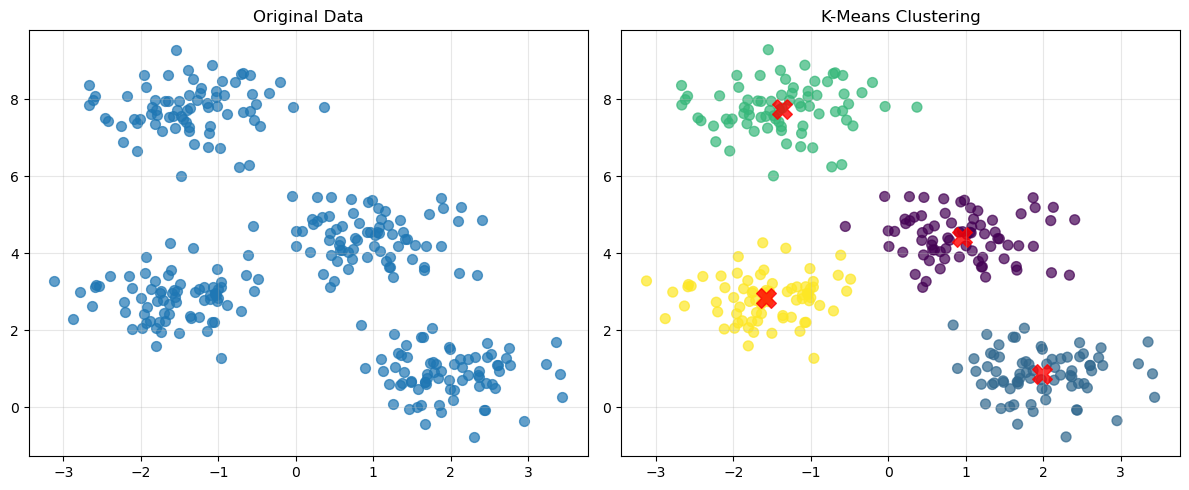

Cluster centers:
[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
Inertia (within-cluster sum of squares): 212.01
Predictions for new points: [3 1 3]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

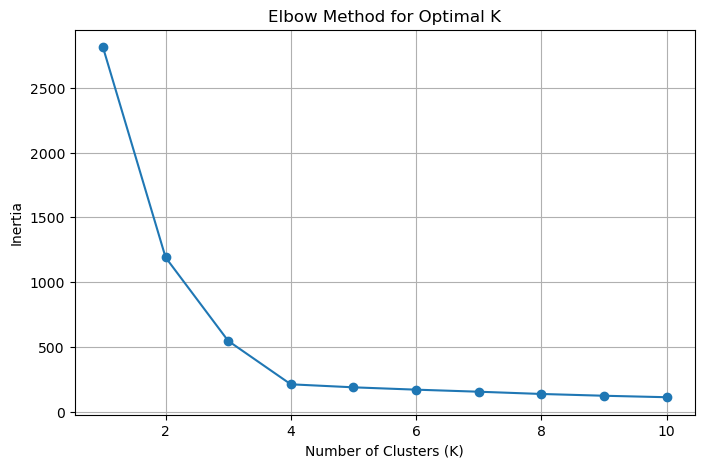

In [11]:
# 7) K-Means Clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Data')
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')
plt.title('K-Means Clustering')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Cluster centers:\n{centers}")
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_:.2f}")
new_points = np.array([[0, 2], [8, 3], [-2, -2]])
predictions = kmeans.predict(new_points)
print(f"Predictions for new points: {predictions}")
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

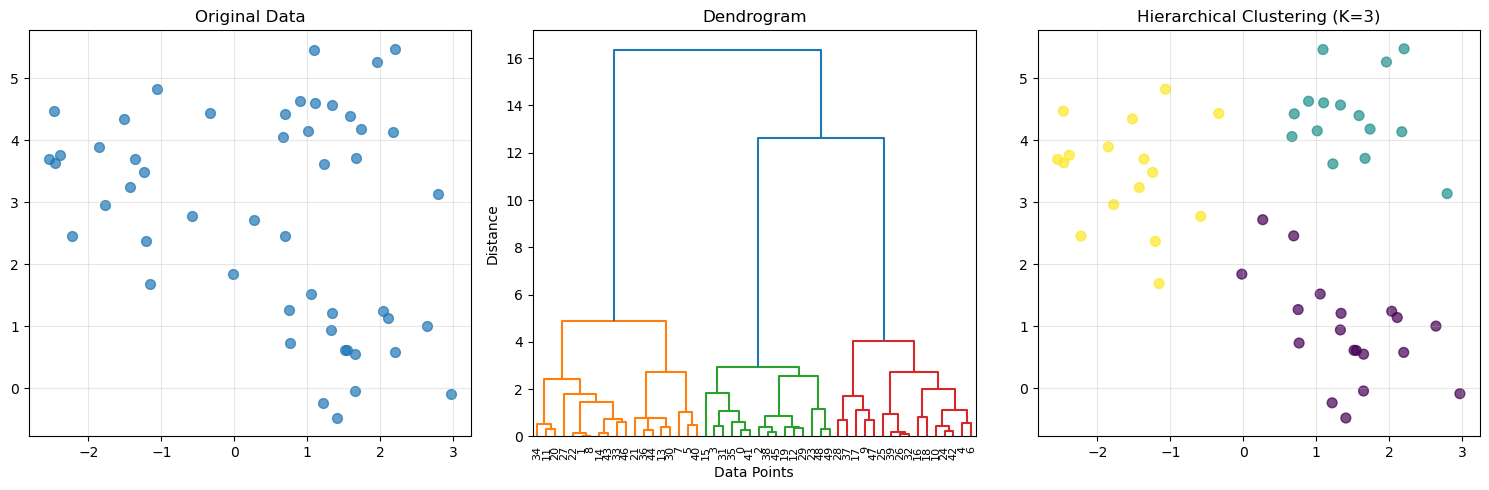

Cluster labels for first 10 points:
[2 0 2 2 1 0 1 0 0 1]

Linkage matrix (first 10 rows):
[[1.00000000e+00 8.00000000e+00 3.06170925e-02 2.00000000e+00]
 [2.60000000e+01 3.20000000e+01 1.00550073e-01 2.00000000e+00]
 [1.40000000e+01 4.30000000e+01 1.26006270e-01 2.00000000e+00]
 [2.20000000e+01 5.00000000e+01 1.50600463e-01 3.00000000e+00]
 [3.90000000e+01 5.10000000e+01 1.74954766e-01 3.00000000e+00]
 [3.80000000e+01 4.50000000e+01 2.08156741e-01 2.00000000e+00]
 [2.40000000e+01 4.20000000e+01 2.46403431e-01 2.00000000e+00]
 [0.00000000e+00 4.10000000e+01 2.65675604e-01 2.00000000e+00]
 [3.60000000e+01 4.40000000e+01 2.68132805e-01 2.00000000e+00]
 [1.10000000e+01 2.00000000e+01 3.09026188e-01 2.00000000e+00]]


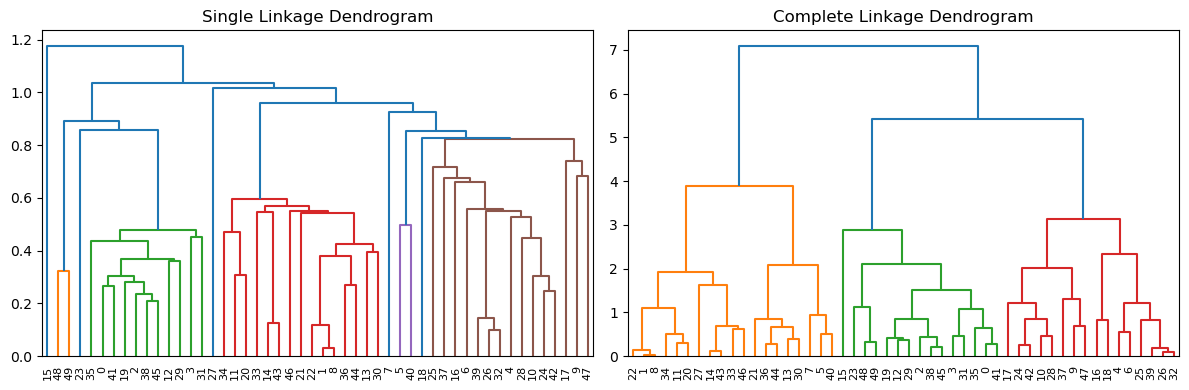

Adjusted Rand Score: 0.820


In [12]:
# 8) Hierarchical Clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

X, y_true = make_blobs(n_samples=50, centers=3, cluster_std=0.80, random_state=0)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Data')
plt.grid(True, alpha=0.3)
Z = linkage(X, method='ward')
plt.subplot(1, 3, 2)
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
num_clusters = 3
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
plt.title(f'Hierarchical Clustering (K={num_clusters})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_sklearn = hierarchical.fit_predict(X)
print("Cluster labels for first 10 points:")
print(labels_sklearn[:10])
print("\nLinkage matrix (first 10 rows):")
print(Z[:10])
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
Z_single = linkage(X, method='single')
dendrogram(Z_single)
plt.title('Single Linkage Dendrogram')
plt.subplot(1, 2, 2)
Z_complete = linkage(X, method='complete')
dendrogram(Z_complete)
plt.title('Complete Linkage Dendrogram')
plt.tight_layout()
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, cluster_labels)
print(f"Adjusted Rand Score: {ari:.3f}")

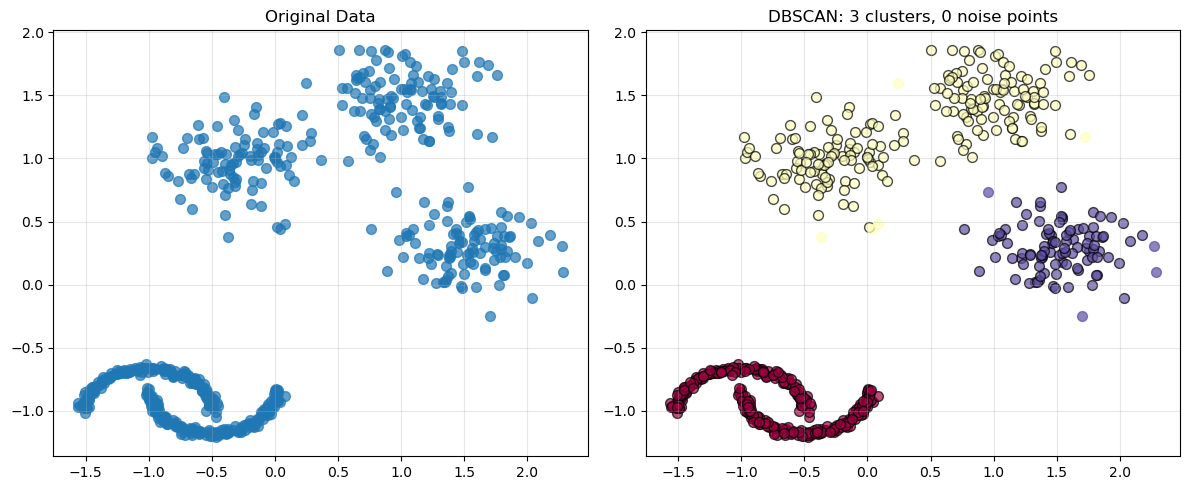

Number of clusters: 3
Number of noise points: 0
Cluster labels: [0 1 2]


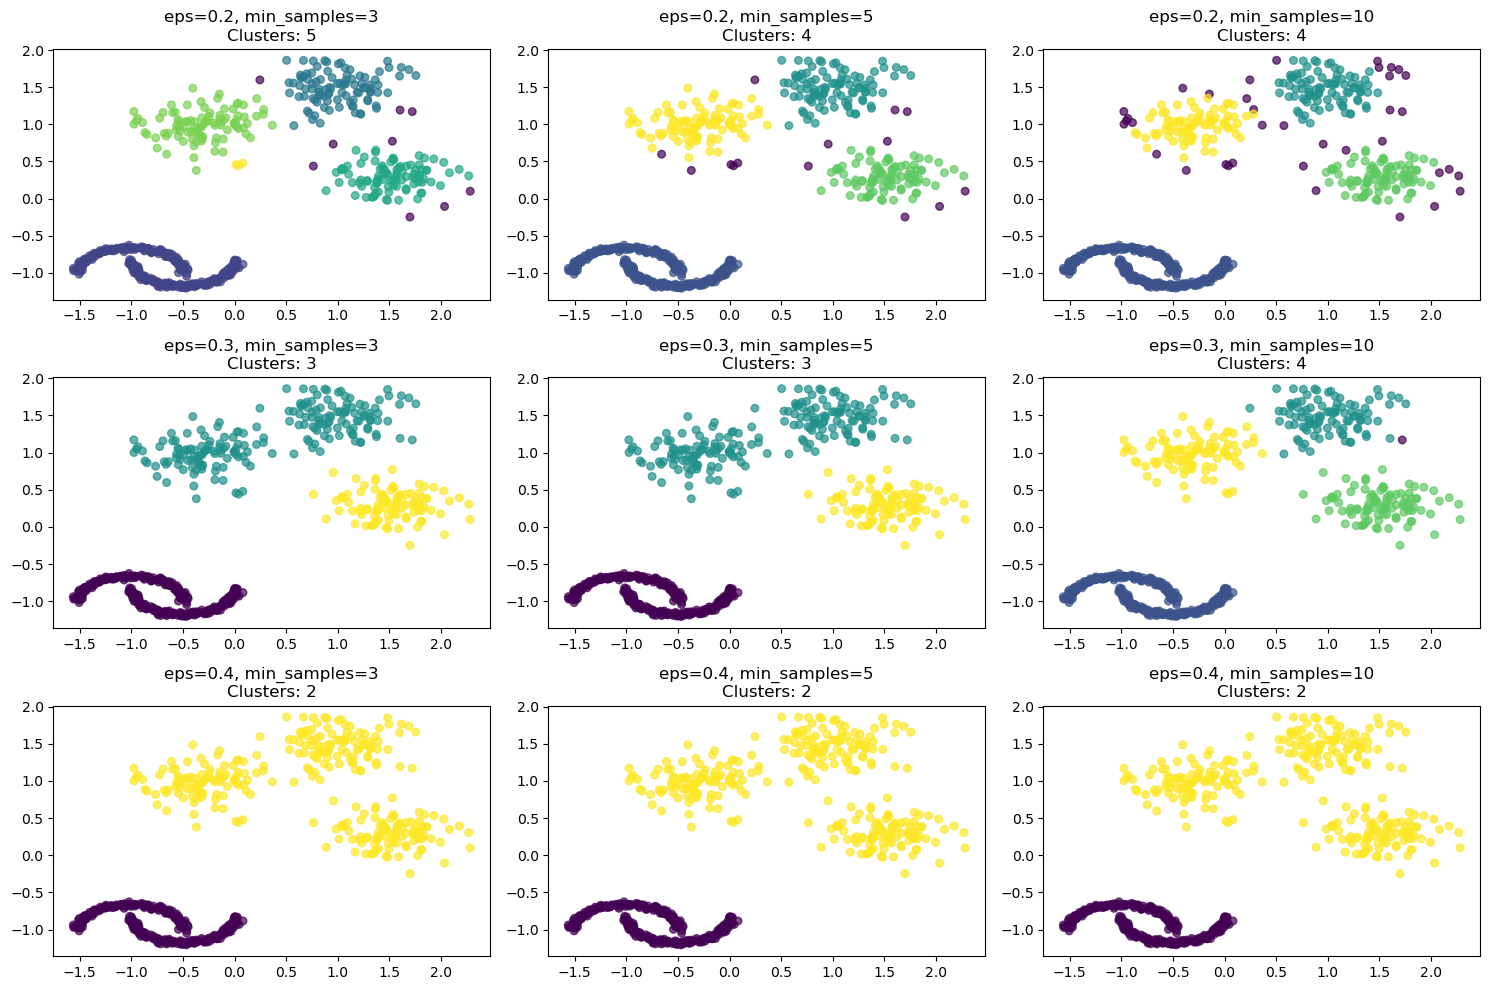

In [13]:
# 9) DBSCAN (Density-Based Clustering)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

X1, y1 = make_moons(n_samples=300, noise=0.05, random_state=0)
X2, y2 = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = np.vstack([X1, X2 + [3, 3]])
X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Original Data')
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, edgecolors='black', alpha=0.7)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, alpha=0.7)
plt.title(f'DBSCAN: {n_clusters} clusters, {n_noise} noise points')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster labels: {np.unique(labels)}")
eps_values = [0.2, 0.3, 0.4]
min_samples_values = [3, 5, 10]
plt.figure(figsize=(15, 10))
plot_num = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        labels_temp = dbscan_temp.fit_predict(X)
        n_clusters_temp = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
        plt.subplot(3, 3, plot_num)
        plt.scatter(X[:, 0], X[:, 1], c=labels_temp, s=30, cmap='viridis', alpha=0.7)
        plt.title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters_temp}')
        plot_num += 1
plt.tight_layout()
plt.show()

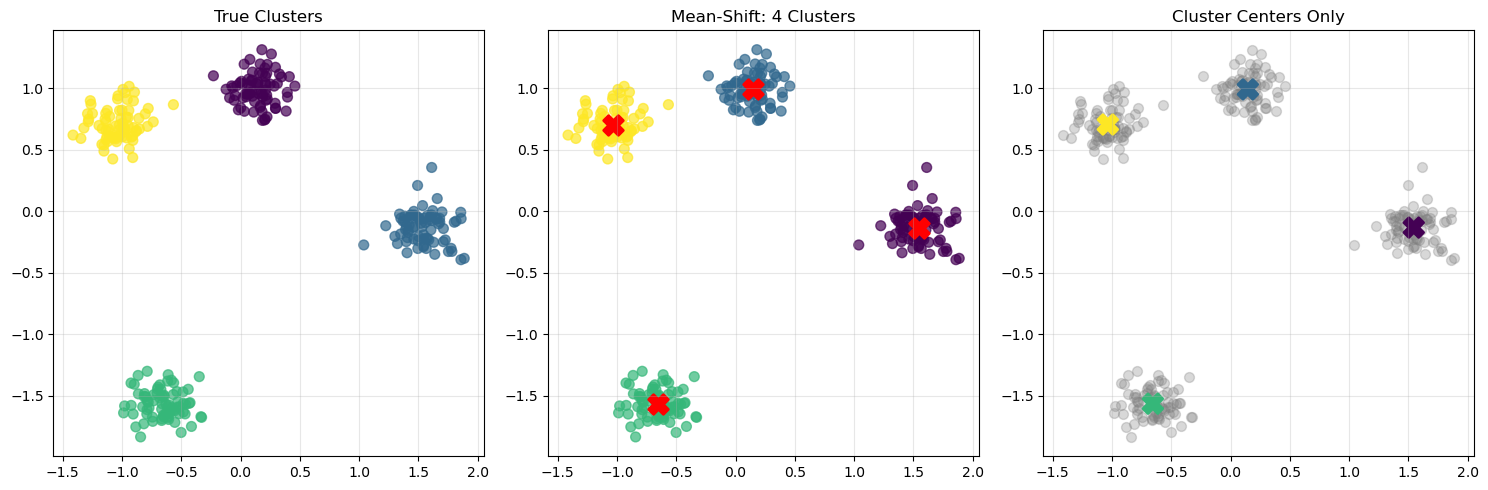

Number of clusters found: 4
Cluster centers shape: (4, 2)


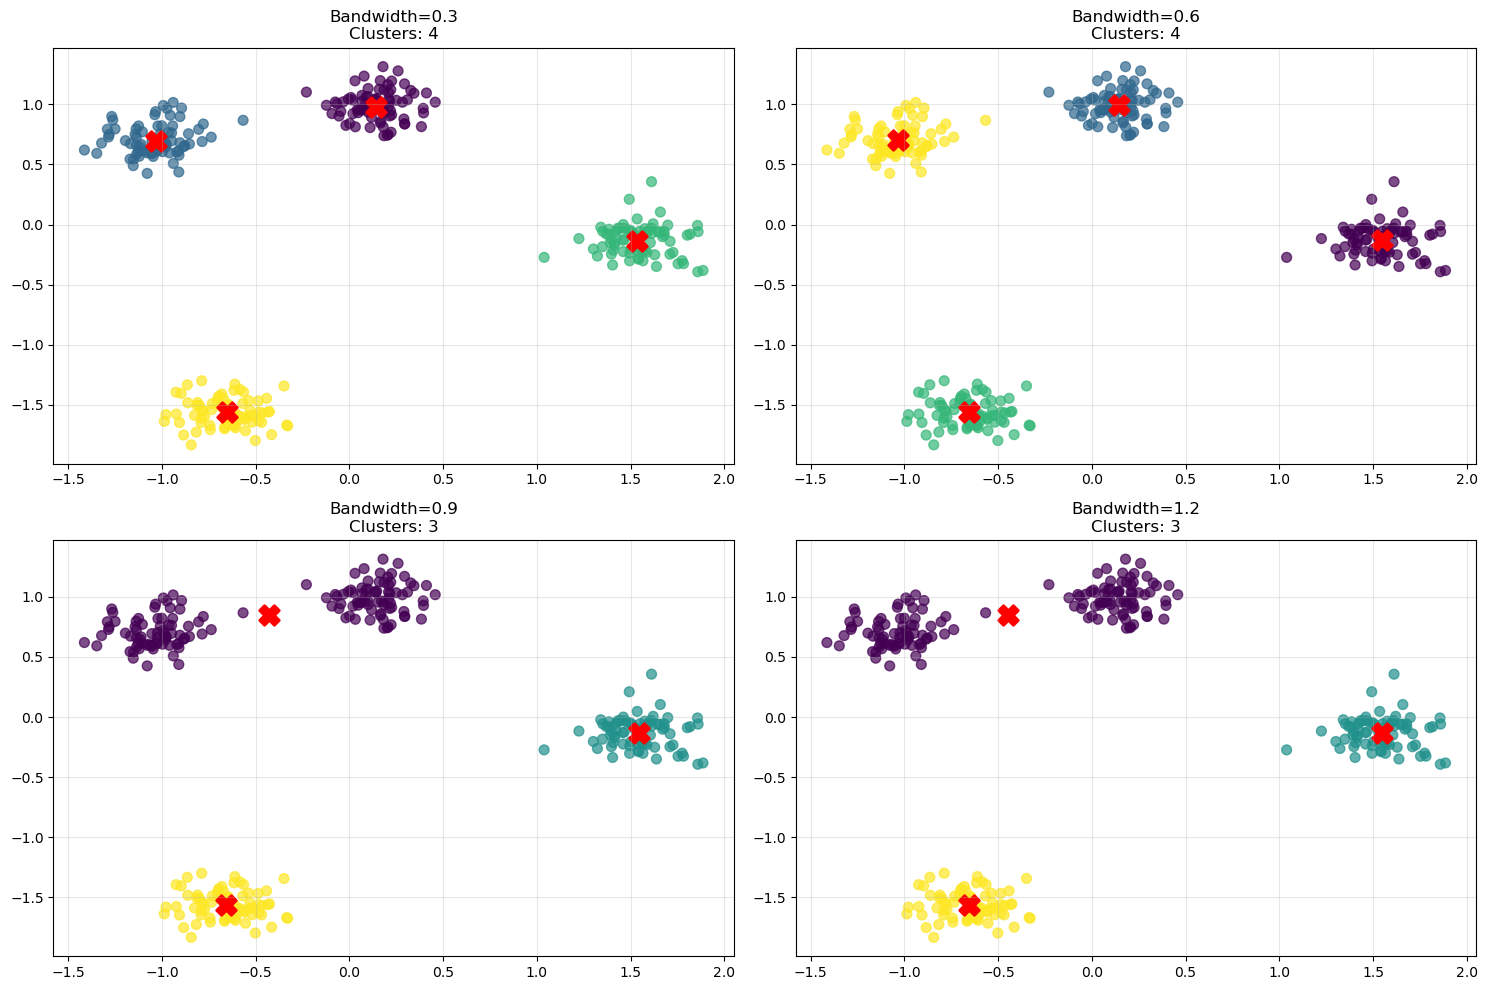

Silhouette Score: 0.839
Predictions for new points: [2 1 1 1]


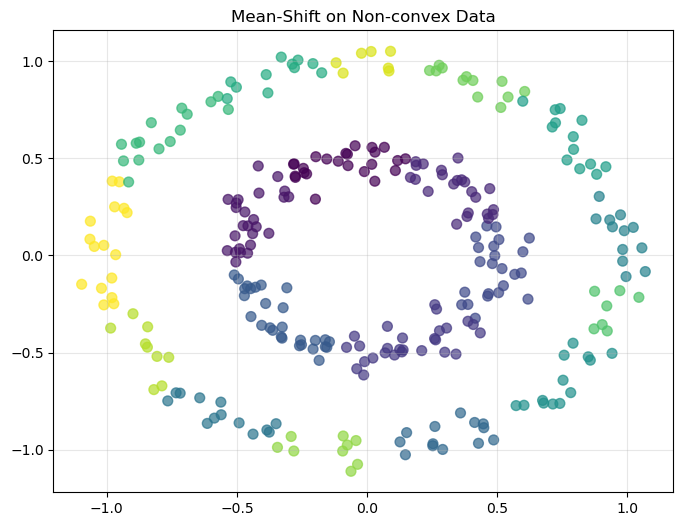

In [14]:
# 10) Mean-Shift Clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
X = StandardScaler().fit_transform(X)
meanshift = MeanShift(bandwidth=0.6)
meanshift.fit(X)
labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_
n_clusters = len(cluster_centers)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('True Clusters')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, linewidth=2)
plt.title(f'Mean-Shift: {n_clusters} Clusters')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.3)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c=range(n_clusters), cmap='viridis', marker='X', s=200, linewidth=2)
plt.title('Cluster Centers Only')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster centers shape: {cluster_centers.shape}")
bandwidth_values = [0.3, 0.6, 0.9, 1.2]
plt.figure(figsize=(15, 10))
for i, bandwidth in enumerate(bandwidth_values):
    meanshift_temp = MeanShift(bandwidth=bandwidth)
    meanshift_temp.fit(X)
    labels_temp = meanshift_temp.labels_
    centers_temp = meanshift_temp.cluster_centers_
    n_clusters_temp = len(centers_temp)
    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels_temp, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(centers_temp[:, 0], centers_temp[:, 1], c='red', marker='X', s=200, linewidth=2)
    plt.title(f'Bandwidth={bandwidth}\nClusters: {n_clusters_temp}')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")
new_points = np.array([[-1, -1], [0, 0], [1, 1], [2, 2]])
predictions = meanshift.predict(new_points)
print(f"Predictions for new points: {predictions}")
from sklearn import datasets
X_circles, y_circles = datasets.make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
meanshift_circles = MeanShift(bandwidth=0.3)
meanshift_circles.fit(X_circles)
labels_circles = meanshift_circles.labels_
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='viridis', s=50, alpha=0.7)
plt.title('Mean-Shift on Non-convex Data')
plt.grid(True, alpha=0.3)
plt.show()